In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/URV/Machine Learning/Notebook_02"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the dataset

fruits = pd.read_csv(path + "/Dataset/fruit_data_with_colors.txt", sep="\t")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


Exploratory Data Analysis
======

In [5]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [6]:
# checking for missing values

fruits.isnull().sum()

,0
fruit_label,0
fruit_name,0
fruit_subtype,0
mass,0
width,0
height,0
color_score,0


In [7]:
# shape of the dataset
fruits.shape

(59, 7)

In [8]:
# class distribution

fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [9]:
# count per class
fruits["fruit_name"].value_counts()

,count
fruit_name,
apple,19
orange,19
lemon,16
mandarin,5


<ipython-input-10-6d9aa8d5528a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x= fruits['fruit_name'], palette = 'Set2')
<ipython-input-10-6d9aa8d5528a>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(fruits['fruit_name'].unique())


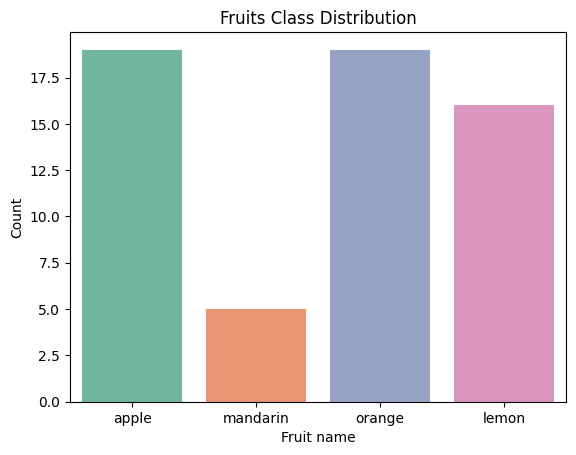

In [10]:
# class distribution visualisation

ax = sns.countplot(x= fruits['fruit_name'], palette = 'Set2')
ax.set_title('Fruits Class Distribution')
ax.set_xlabel('Fruit name')
ax.set_ylabel('Count')
ax.set_xticklabels(fruits['fruit_name'].unique())
plt.show()


Statistical Summary
======

In [12]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [14]:
# mean, median, and mode for Mass
print("Mean:", fruits['mass'].mean())
print("Median:", fruits['mass'].median())
print("Mode:", fruits['mass'].mode()[0])

Mean: 163.11864406779662
Median: 158.0
Mode: 116


Visualising Feature Distribution
======

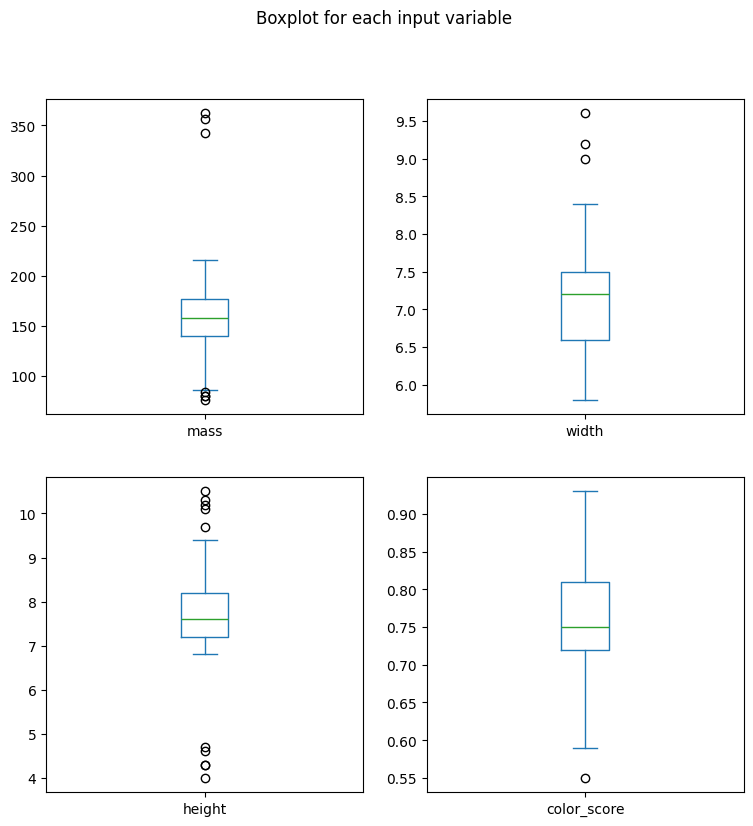

In [19]:
# boxplot for numerical features
fruits.drop('fruit_label', axis=1).plot(
    kind = 'box',
    subplots=True,
    layout=(2,2),
    sharex=False,
    sharey=False,
    figsize=(9,9),
    title= 'Boxplot for each input variable')

plt.savefig('fruits_box')
plt.show()

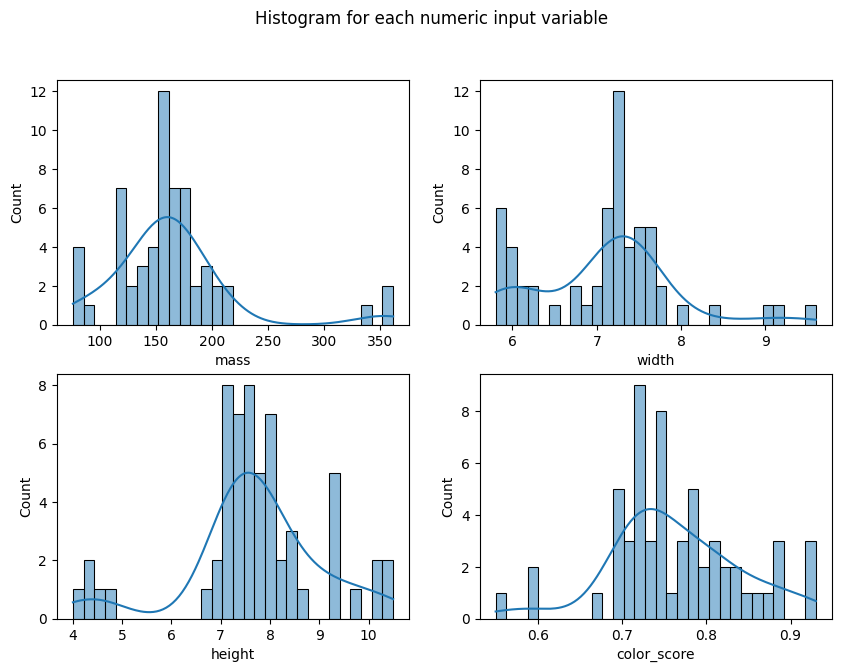

In [21]:
# histogram of features

fig, axs = plt.subplots(2,2, figsize=(10,7))
axs = axs.ravel()

for i, var in enumerate(['mass', 'width', 'height', 'color_score']):
  sns.histplot(data=fruits, x=var, ax=axs[i], kde=True, bins=30)

plt.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')

Feature Correlations
======

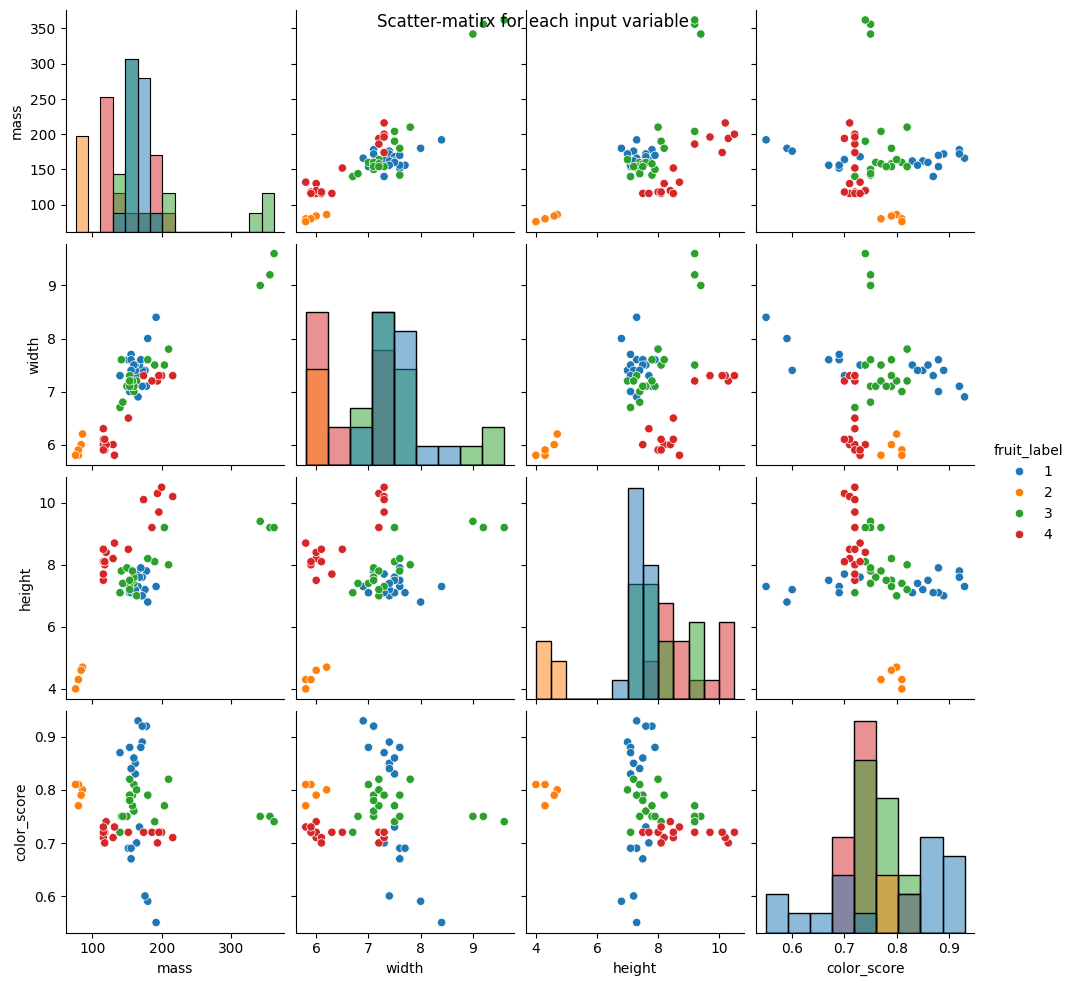

In [22]:
sns.pairplot(fruits, hue = 'fruit_label', diag_kind='hist', palette='tab10')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

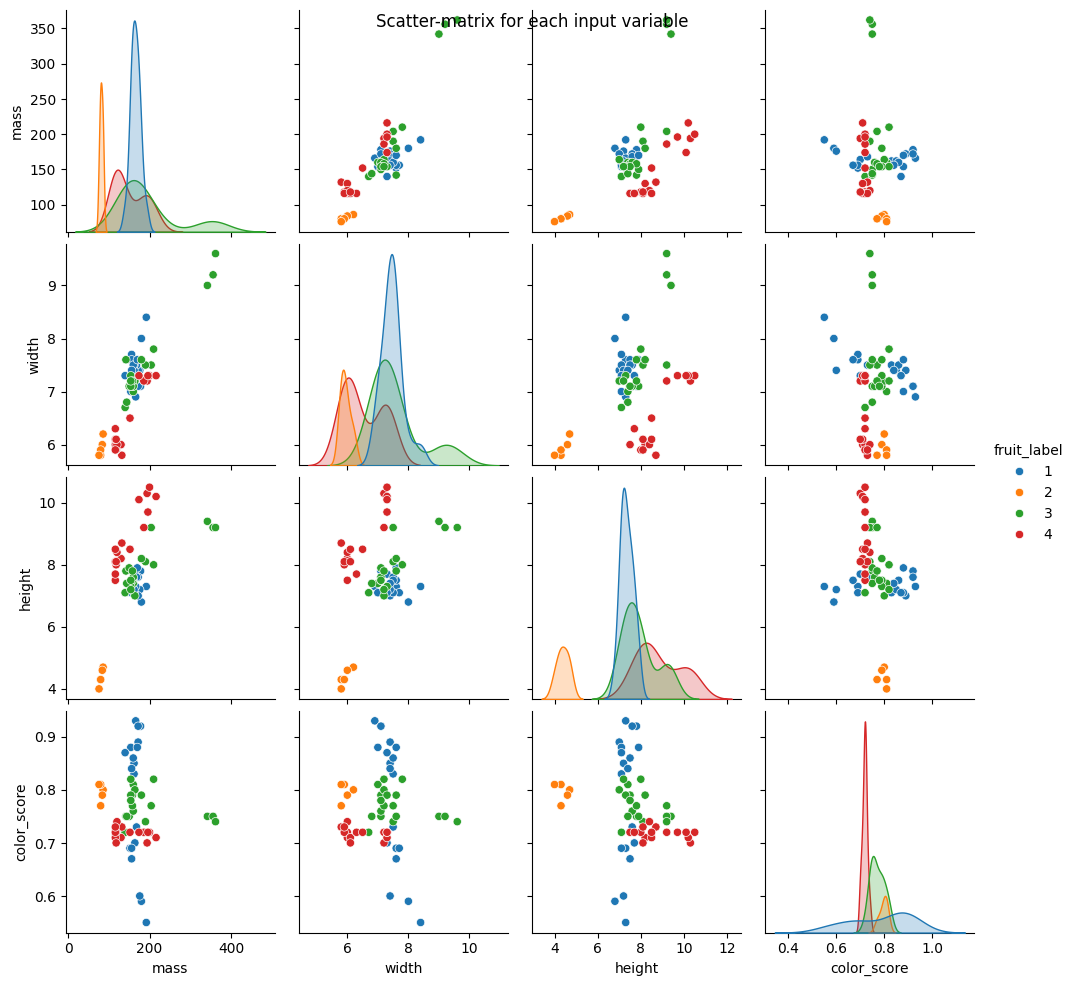

In [23]:
sns.pairplot(fruits, hue = 'fruit_label', palette='tab10')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')